In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
train_data = pd.read_csv('QQQ.csv')
test_data = pd.read_csv('QQQTest.csv')

In [91]:
from datetime import datetime
train_data['Date'] = pd.date_range('1/1/2021', periods=104, freq='W-MON')
test_data['Date'] = pd.date_range('1/1/2021', periods=17, freq='W-MON')

In [92]:
train_data.set_index('Date',inplace=True)
test_data.set_index('Date',inplace=True)

In [93]:
train_data

,QQQ,AAPL-Close,MSFT-Close,AMZN-Close,GOOG-Close,FB-Close
Date,,,,,,
2021-01-04,218.43,77.58,161.34,1883.16,1429.73,218.06
2021-01-11,223.38,79.68,167.10,1864.72,1480.39,222.14
2021-01-18,222.70,79.58,165.04,1861.64,1466.71,217.94
2021-01-25,219.07,77.38,170.23,2008.72,1434.23,201.91
2021-02-01,229.20,80.01,183.89,2079.28,1479.23,212.33
...,...,...,...,...,...,...
2022-11-28,383.13,161.84,323.01,3389.79,2850.41,306.84
2022-12-05,398.01,179.45,342.54,3444.24,2973.50,329.75
2022-12-12,384.91,171.14,323.80,3400.35,2856.06,333.79


In [94]:
test_data

,QQQ,AAPL-Close,MSFT-Close,AMZN-Close,GOOG-Close,FB-Close
Date,,,,,,
2021-01-04,379.86,172.17,314.04,3251.08,2740.09,331.79
2021-01-11,380.01,173.07,310.20,3242.76,2795.73,331.90
2021-01-18,351.69,162.41,296.03,2852.86,2601.84,303.17
2021-01-25,351.80,170.33,308.26,2879.56,2665.79,301.71
2021-02-01,358.01,172.39,305.94,3152.79,2860.32,237.09
2021-02-08,347.06,168.64,295.04,3065.87,2682.60,219.55
2021-02-15,341.51,167.30,287.93,3052.03,2609.35,206.16
2021-02-22,345.77,164.85,297.31,3075.77,2690.39,210.48
2021-03-01,337.30,163.17,289.86,2912.82,2642.44,200.06


In [95]:
predictors = ['AAPL-Close', 'MSFT-Close', 'AMZN-Close', 'GOOG-Close', 'FB-Close']
X_train = train_data[predictors].values
X_test = test_data[predictors].values
y_train = train_data['QQQ'].values

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_predict = model.predict(X_test)
test_data['predict'] = y_predict

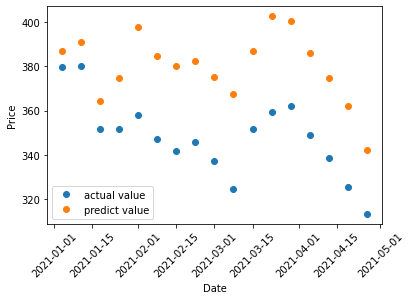

In [98]:
plt.plot(test_data['QQQ'],'o',label='actual value')
plt.xticks(rotation=45)
plt.plot(test_data['predict'],'o',label='predict value')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')